<a href="https://colab.research.google.com/github/MarcSchneider71/Distributions/blob/main/Project_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
import scipy.stats as stats
from scipy.stats import beta

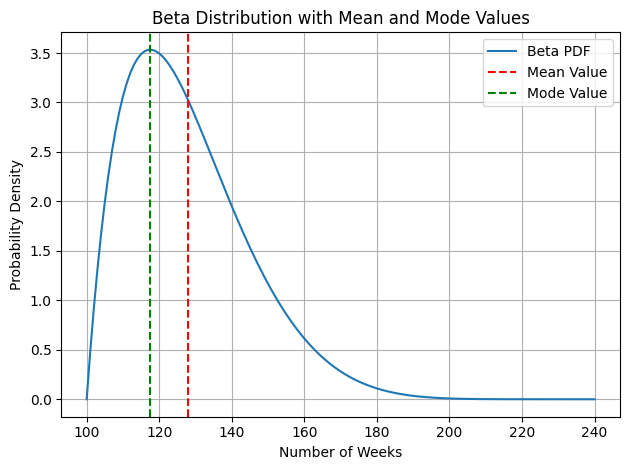

In [223]:
def beta_mode(range_min, range_max, alpha, beta_value):
    # Define a small range for fine-grained sampling
    small_range = np.linspace(range_min, range_max, 1000)

    # Calculate the PDF values in the small range
    pdf_values = beta.pdf((small_range - range_min) / (range_max - range_min), alpha, beta_value)

    # Find the index of the maximum PDF value
    max_index = np.argmax(pdf_values)

    # Retrieve the mode (peak) of the curve in the original range
    mode_value = small_range[max_index]

    return mode_value

# Given range estimates
range_min = 100  # Minimum weeks for the project
range_max = 240  # Maximum weeks for the project

# Choose alpha and beta parameters to control the shape of the Beta distribution
alpha = 2
beta_value = 8

# Create an array of x values representing the number of weeks for plotting
weeks = np.arange(range_min, range_max + 1)

# Calculate the Beta PDF (Probability Density Function) using the given parameters
pdf_values = beta.pdf((weeks - range_min) / (range_max - range_min), alpha, beta_value)

# Calculate the mean of the Beta distribution
mean_value = (alpha / (alpha + beta_value)) * (range_max - range_min) + range_min

# Calculate the mode of the Beta distribution
mode_value = beta_mode(range_min, range_max, alpha, beta_value)

# Plot the Beta distribution, the mean value, and the mode value
plt.plot(weeks, pdf_values, label="Beta PDF")
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1.5, label="Mean Value")
plt.axvline(mode_value, color='g', linestyle='dashed', linewidth=1.5, label="Mode Value")

# Set plot labels and title
plt.xlabel("Number of Weeks")
plt.ylabel("Probability Density")
plt.title("Beta Distribution with Mean and Mode Values")
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [218]:
print("Mean value of project length:", mean_value)
print("Mode value of project length:", mode_value)

Mean value of project length: 128.0
Mode value of project length: 117.51751751751752


In [219]:
def probability_complete_up_to_weeks(num_weeks, range_min, range_max, alpha, beta):
    if num_weeks < range_min:
        return 0.0  # Probability is 0 if less than the minimum weeks

    if num_weeks >= range_max:
        return 1.0  # Probability is 1 if equal to or greater than the maximum weeks

    # Calculate the cumulative probability up to the given number of weeks
    cdf_value = stats.beta.cdf((num_weeks - range_min) / (range_max - range_min), alpha, beta)

    return cdf_value




In [221]:
probability_complete_up_to_weeks(128,range_min, range_max, alpha, beta_value)

0.5637923840000003